<a href="https://colab.research.google.com/github/divyakumar95/ProgrammingDA_CA/blob/main/Prog_Da_CA02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# B9AI108 Programming for Data Analysis (B9AI108_2122_TMD1S)

## Data Acquisition and Preprocessing.


### Primary objective: To design and develop a Data Acquisition and Preprocessing Pipeline.

## CA_TWO_(30%)

* Primary objective: To design and develop a Data Acquisition and Preprocessing Pipeline.
* Details of assignment brief
* Assessment Task (30%)

You are required to develop a Data Acquisition and Preprocessing Pipeline of your choice, including data acquisition (API, Web scraping, DB Extract etc.), Extraction of features and Transformations as appropriate, followed by loading into an appropriate database. The focus of the complexity of the pipeline is your choice.

Use Git (e.g. GitHub / Colab) and commit/pin version regularly.

Implementation 70%

Documentation 30%

# Problem statement

* As Netfix executive we are assigned to prepare a dataset for movie recommendation for uses based on the previos genre and rating.

## Work breakdown

* We will be using a 3rd party free API ([TMDB](https://developers.themoviedb.org/3/movies/get-top-rated-movies)) to create the movie dataset.
* Data understanding
* Data Prepartion
* Data Visualization
* Store Data to remote server for future use case

## Getting API

* Create a new Sign in and get API

* [TMDB Documentaion](https://developers.themoviedb.org/3/getting-started/introduction)




## Data Acquisition

 API key path

In [102]:
import requests,json

api_key_path = '/content/drive/MyDrive/DataAnalytics/configuration.json'

with open(api_key_path) as f:
    data = json.load(f)
    api_key = data['tmdbapi']['apikey']

### Define pull data from API

* Input is number of pages to get from API

In [103]:
def pull_data(pages):
  resp_list = []
  for i in range(1,pages):
    Full_url = 'https://api.themoviedb.org/3/movie/top_rated?api_key='+api_key+'&language=en-US&page='+str(i)
    resp = requests.get(Full_url)
    x = resp.json()
    resp_list.append(x)
  return resp_list

resp = pull_data(100)

Checking all the columns present in results

In [104]:
data_columns = resp[0]['results'][0].keys()
print(data_columns)

dict_keys(['adult', 'backdrop_path', 'genre_ids', 'id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'release_date', 'title', 'video', 'vote_average', 'vote_count'])


Creating empty dataframe withe the required columns

In [105]:
import pandas as pd
emptyDf = pd.DataFrame(columns=data_columns)
emptyDf

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count


## Data understanding

### Define insert data to data frame

* Push all the data into the empty dataframe which is already present.

* Get all the info about the dataframe

In [106]:
def inserting_data(a,pd_data):
  for i in range(len(a)):
    for j in range(len(a[i]['results'])):
      hel = a[i]['results'][j]
      pd_data = pd_data.append(hel, ignore_index=True)
  return pd_data

data = inserting_data(resp,emptyDf)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              1980 non-null   object 
 1   backdrop_path      1978 non-null   object 
 2   genre_ids          1980 non-null   object 
 3   id                 1980 non-null   object 
 4   original_language  1980 non-null   object 
 5   original_title     1980 non-null   object 
 6   overview           1980 non-null   object 
 7   popularity         1980 non-null   float64
 8   poster_path        1980 non-null   object 
 9   release_date       1980 non-null   object 
 10  title              1980 non-null   object 
 11  video              1980 non-null   object 
 12  vote_average       1980 non-null   float64
 13  vote_count         1980 non-null   object 
dtypes: float64(2), object(12)
memory usage: 216.7+ KB


#### Columns Description
* poster_path: movie poster path
* adult: Adult type movie - Boolean 
* overview: Movie Overview
* release_date: Movie release date
* genre_ids: Movie Genre
* id: unique movie ids
* original_title: Movie original title
* original_language: Movie language
* title: Movie title
* backdrop_path: Movie background poster for webpage path
* popularity: Movie Popularity
* vote_count: Number of votes for movie
* video: check for trailer - Boolean
* vote_average: Average votes

#### Genre Ids description 
[Source](https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee)

*MOVIE*

*Action : 28*

*Adventure : 12*

*Animation : 16*

*Comedy : 35*

*Crime : 80*

*Documentary : 99*

*Drama : 18*

*Family : 10751*

*Fantasy : 14*

*History : 36*

*Horror : 27*

*Music : 10402*

*Mystery : 9648*

*Romance : 10749*

*Science Fiction : 878*

*TV Movie : 10770*

*Thriller : 53*

*War : 10752*

*Western : 37*

In [77]:
genre_columns = { 
 28:'Action',
 12:'Adventure',
 16:'Animation',
 35:'Comedy',
 80:'Crime',
 99:'Documentary',
 18:'Drama',
 10751:'Family',
 14:'Fantasy',
 36:'History',
 27:'Horror',
 10402:'Music',
 9648:'Mystery',
 10749:'Romance',
 878:'Science Fiction',
 10770:'TV Movie',
 53:'Thriller',
 10752:'War',
 37:'Western'
}

Checking the last value of the dataset

In [34]:
data.tail(2)

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
1978,False,/mYzmWGhy9PZ6xUo0D4i3bBRdX2u.jpg,"[18, 36]",245168,en,Suffragette,Based on true events about the foot soldiers o...,10.032,/vETQNfswR1R7SOIpGuFDv66xfb7.jpg,2015-10-16,Suffragette,False,7.3,1370
1979,False,/g9ROrZey0JYp7kf8DoAyZtKnObj.jpg,[27],377,en,A Nightmare on Elm Street,Teenagers in a small town are dropping like fl...,33.090,/wGTpGGRMZmyFCcrY2YoxVTIBlli.jpg,1984-11-09,A Nightmare on Elm Street,False,7.3,3765


## Data Preparation

### Alter Genre column

Create a new dataframe for getting each genere for respective ids

In [62]:
genre_df = pd.concat([data['genre_ids'],data['id']],axis=1)

Expanding the list of column data

* [Assign and Explode](https://www.geeksforgeeks.org/convert-list-like-column-elements-to-separate-rows-in-pandas/)

In [63]:
df_explode = genre_df.assign(old_genre=genre_df.genre_ids).explode('genre_ids')
df_explode.head()

,genre_ids,id,old_genre
0,35,19404,"[35, 18, 10749]"
0,18,19404,"[35, 18, 10749]"
0,10749,19404,"[35, 18, 10749]"
1,18,278,"[18, 80]"
1,80,278,"[18, 80]"


Drop old_genre column and get info.

In [64]:
df_explode = df_explode.drop('old_genre',axis=1)
df_explode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5032 entries, 0 to 1979
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   genre_ids  5032 non-null   object
 1   id         5032 non-null   object
dtypes: object(2)
memory usage: 117.9+ KB


In [65]:
print('Total number of Movies:',len(df_explode['id'].unique()))
print('Differnt Types of Genre:',len(df_explode['genre_ids'].unique()))

Total number of Movies: 1980
Differnt Types of Genre: 18


Converting all the genre column data to new columns

* [Pivot Table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html)




In [71]:
def row_column(df,column_name):
  geners = df.pivot(columns=[column_name]) #,index=['id']) #'genre_ids',['id'])
  geners.columns = geners.columns.droplevel()
  return geners

geners = row_column(df_explode,'genre_ids')

In [72]:
geners.shape

(1980, 18)

In [75]:
geners.head(2)

genre_ids,12,14,16,18,27,28,35,36,37,53,80,878,9648,10402,10749,10751,10752,10770
0,NaN,NaN,NaN,19404,NaN,NaN,19404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19404,NaN,NaN,NaN
1,NaN,NaN,NaN,278,NaN,NaN,NaN,NaN,NaN,NaN,278,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Define replace function for geners and replace column names

In [78]:
def replace(df,column_name):
  df = df > 1
  df = df.replace([False],  0)
  df = df.rename(columns=column_name)
  return df

geners = replace(geners,genre_columns)
geners.head()

genre_ids,Adventure,Fantasy,Animation,Drama,Horror,Action,Comedy,History,Western,Thriller,Crime,Science Fiction,Mystery,Music,Romance,Family,War,TV Movie
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Merge original dataframe and genre dataframe

In [79]:
data_new = pd.concat([data,geners],axis=1)
data_new.head(2)

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count,Adventure,Fantasy,Animation,Drama,Horror,Action,Comedy,History,Western,Thriller,Crime,Science Fiction,Mystery,Music,Romance,Family,War,TV Movie
0,False,/5hNcsnMkwU2LknLoru73c76el3z.jpg,"[35, 18, 10749]",19404,hi,दिलवाले दुल्हनिया ले जायेंगे,"Raj is a rich, carefree, happy-go-lucky second...",21.562,/2CAL2433ZeIihfX1Hb2139CX0pW.jpg,1995-10-20,Dilwale Dulhania Le Jayenge,False,8.7,3286,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,False,/iNh3BivHyg5sQRPP1KOkzguEX0H.jpg,"[18, 80]",278,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,71.202,/q6y0Go1tsGEsmtFryDOJo3dEmqu.jpg,1994-09-23,The Shawshank Redemption,False,8.7,20318,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
data_new = data_new.drop(['backdrop_path','genre_ids','poster_path','overview','video','original_title'],axis=1)
data_new.head(3)


,adult,id,original_language,popularity,release_date,title,vote_average,vote_count,Adventure,Fantasy,Animation,Drama,Horror,Action,Comedy,History,Western,Thriller,Crime,Science Fiction,Mystery,Music,Romance,Family,War,TV Movie
0,False,19404,hi,21.562,1995-10-20,Dilwale Dulhania Le Jayenge,8.7,3286,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,False,278,en,71.202,1994-09-23,The Shawshank Redemption,8.7,20318,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,False,238,en,59.050,1972-03-14,The Godfather,8.7,15193,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
from sklearn.preprocessing import LabelEncoder

def data_encoding(df,c):
  le = LabelEncoder()
  for i in c:
    df[i] = le.fit_transform(df[i])
  return df

encoding_columns = ['original_language','adult']
data_new = data_encoding(data_new,encoding_columns)
data_new.head(2)

,adult,id,original_language,popularity,release_date,title,vote_average,vote_count,Adventure,Fantasy,Animation,Drama,Horror,Action,Comedy,History,Western,Thriller,Crime,Science Fiction,Mystery,Music,Romance,Family,War,TV Movie
0,0,19404,14,21.562,1995-10-20,Dilwale Dulhania Le Jayenge,8.7,3286,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,278,8,71.202,1994-09-23,The Shawshank Redemption,8.7,20318,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Check for Nan's in final dataset

In [86]:
data_new.isna().sum()

adult                0
id                   0
original_language    0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
Adventure            0
Fantasy              0
Animation            0
Drama                0
Horror               0
Action               0
Comedy               0
History              0
Western              0
Thriller             0
Crime                0
Science Fiction      0
Mystery              0
Music                0
Romance              0
Family               0
War                  0
TV Movie             0
dtype: int64

Check all the information of the data

In [88]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              1980 non-null   int64  
 1   id                 1980 non-null   object 
 2   original_language  1980 non-null   int64  
 3   popularity         1980 non-null   float64
 4   release_date       1980 non-null   object 
 5   title              1980 non-null   object 
 6   vote_average       1980 non-null   float64
 7   vote_count         1980 non-null   object 
 8   Adventure          1980 non-null   float64
 9   Fantasy            1980 non-null   float64
 10  Animation          1980 non-null   float64
 11  Drama              1980 non-null   float64
 12  Horror             1980 non-null   float64
 13  Action             1980 non-null   float64
 14  Comedy             1980 non-null   float64
 15  History            1980 non-null   float64
 16  Western            1980 

## Data Visualization

### Plot bargraph for each column to know about data distribution

In [89]:
import matplotlib.pyplot as plt
import numpy as np

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

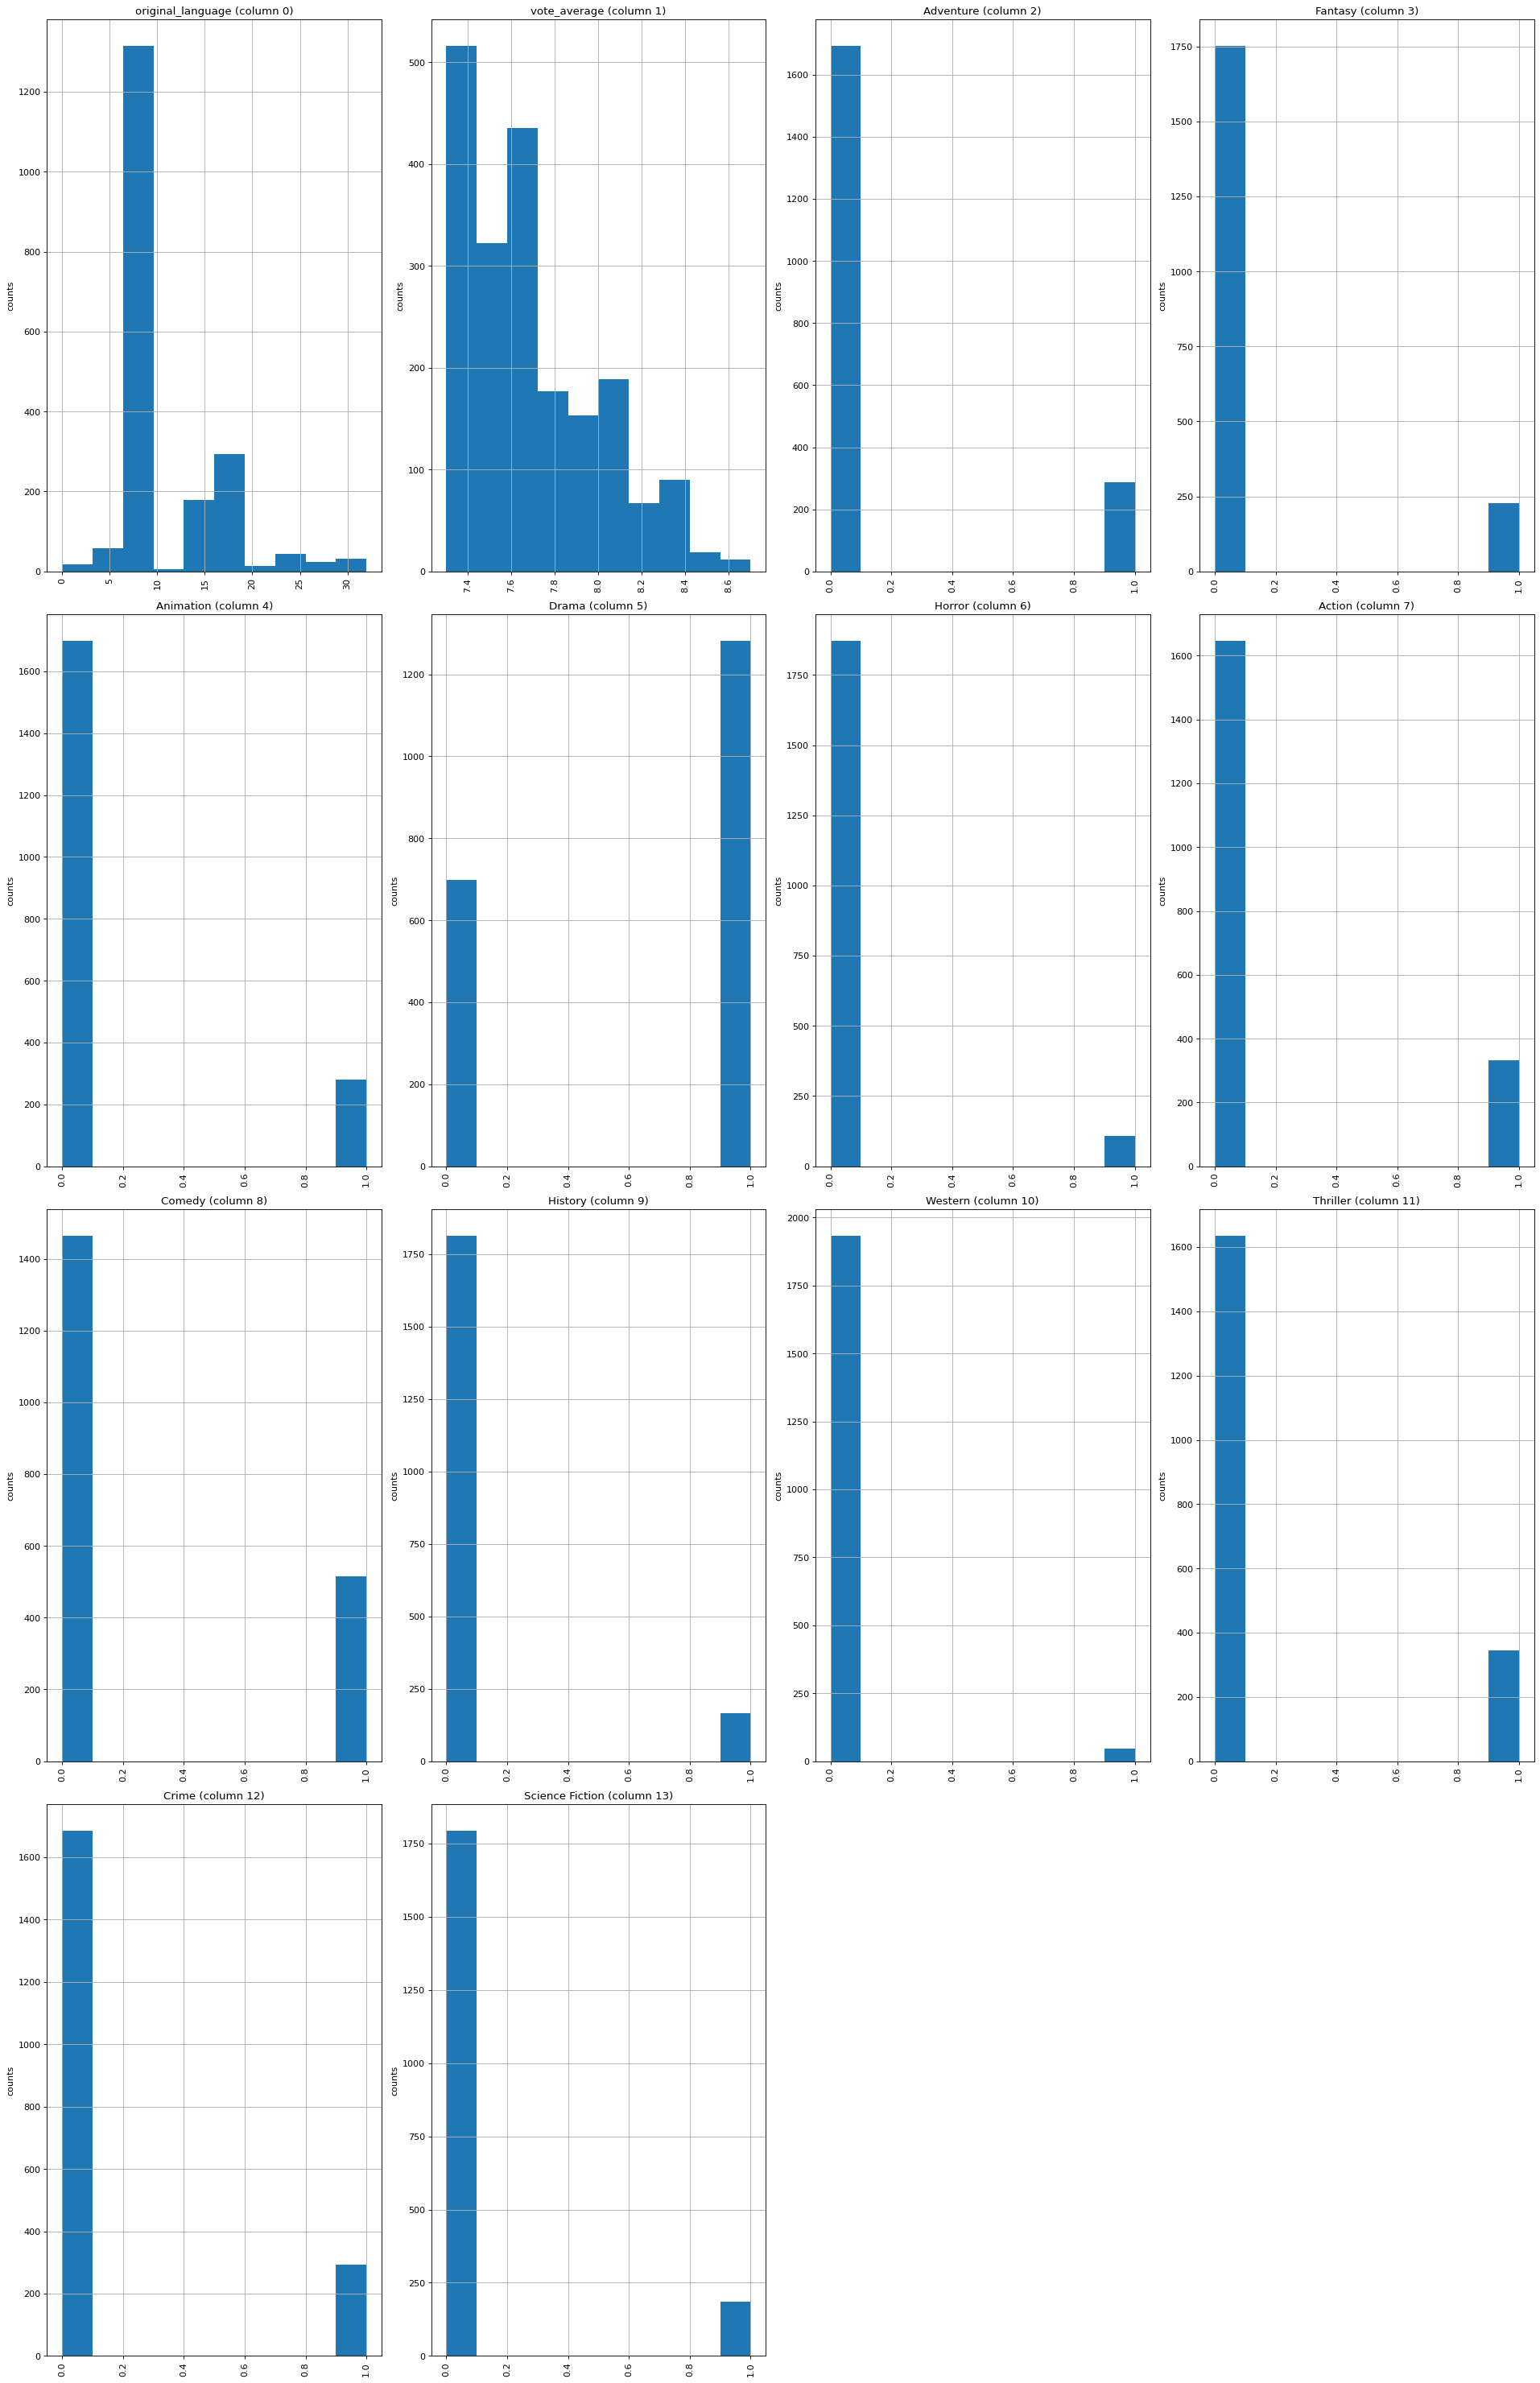

In [90]:
plotPerColumnDistribution(data_new, 14, 4)

### Plot correlation matrix for the dataset

In [91]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth, db):
    filename = db
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

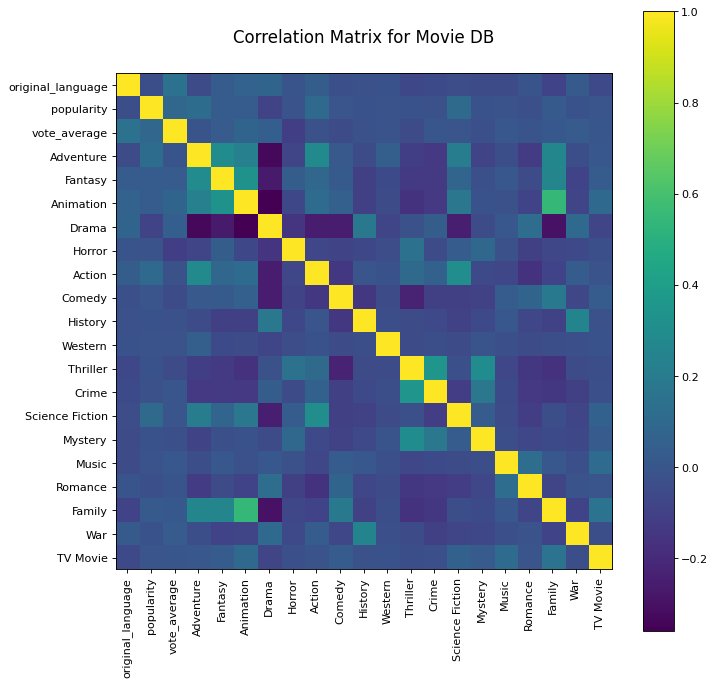

In [92]:
plotCorrelationMatrix(data_new,10,'Movie DB')

### Scatter Plot for data density

In [93]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

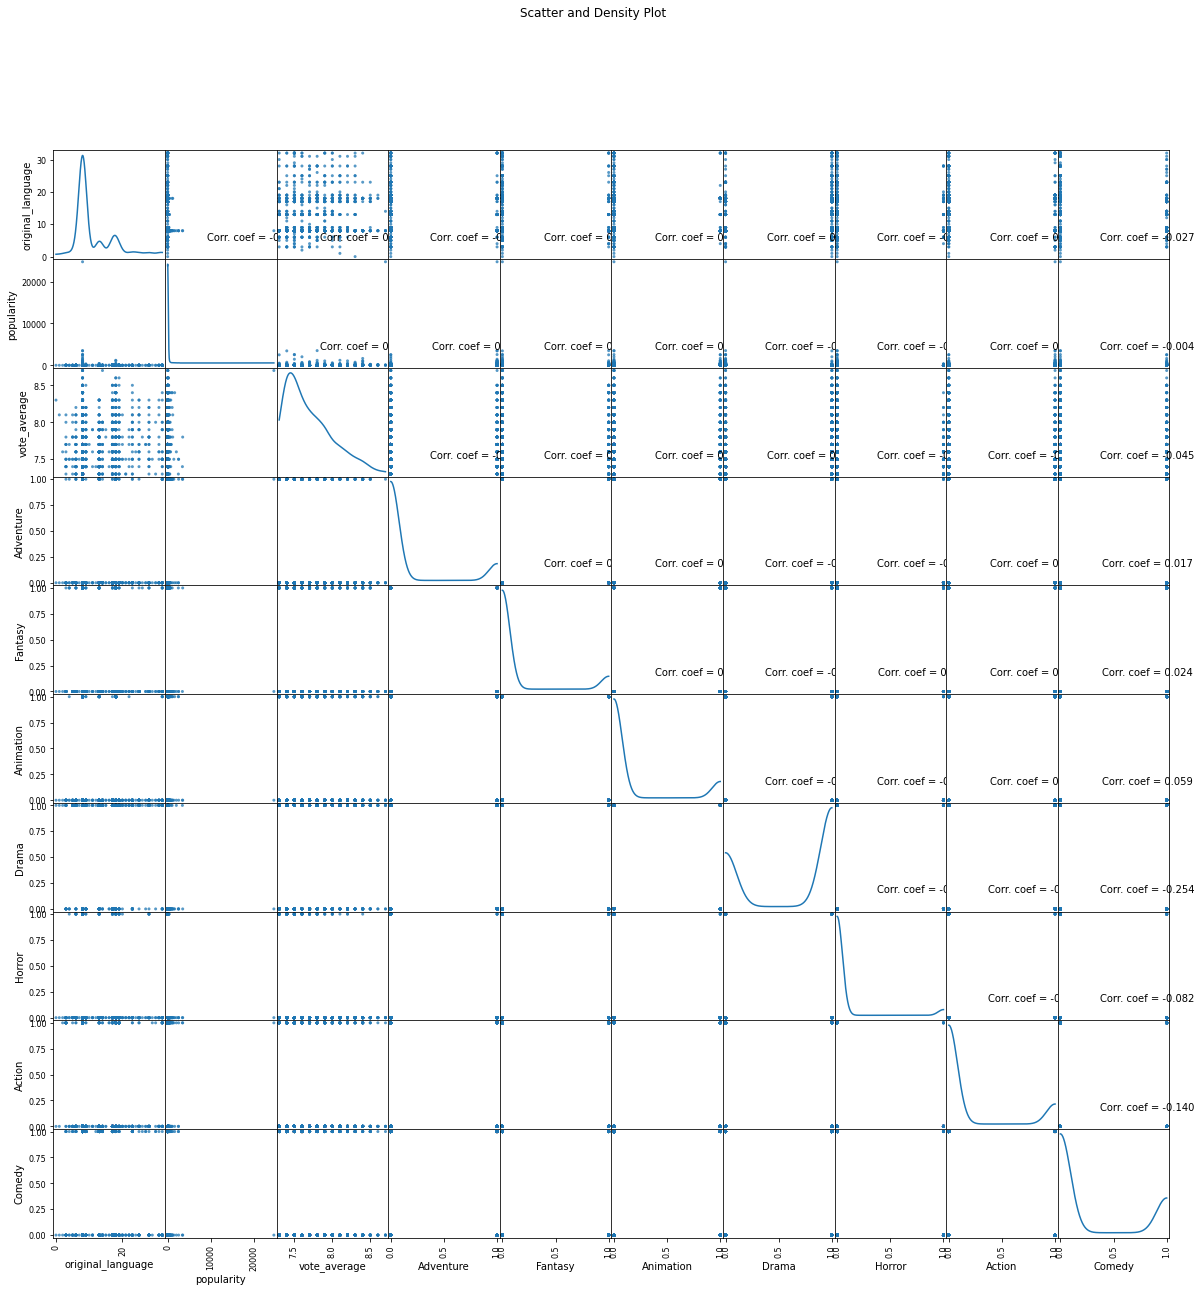

In [94]:
plotScatterMatrix(data_new, 20, 10)

## Storing Data into remote server

### Install dependencies

In [157]:
%%sh
curl https://packages.microsoft.com/keys/microsoft.asc | apt-key add -
curl https://packages.microsoft.com/config/ubuntu/16.04/prod.list > /etc/apt/sources.list.d/mssql-release.list
sudo apt-get update
sudo ACCEPT_EULA=Y apt-get -q -y install msodbcsql17

OK
Hit:1 https://packages.microsoft.com/ubuntu/16.04/prod xenial InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:13 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   983  100   983    0     0   6143      0 --:--:-- --:--:-- --:--:--  6105
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    79  100    79    0     0   1082      0 --:--:-- --:--:-- --:--:--  1082


In [156]:
!pip -q install pypyodbc
!pip -q install pyodbc

### Import configration file and get sql user id pw

Config file structure 

`"mssql":{ "host":"*ServerIP*",
      "user":"*username*",
      "passwd":"*Password*"
  }`

In [108]:
import requests,json

api_key_path = '/content/drive/MyDrive/DataAnalytics/configuration.json'

with open(api_key_path) as f:
    data = json.load(f)
    mssql = data['mssql']

* [SQL Connect Sample](https://docs.microsoft.com/en-us/azure/azure-sql/database/connect-query-python)

In [109]:
from sqlalchemy import create_engine
import pypyodbc
import pyodbc
import urllib

host= mssql['host']
user= mssql['user']
passd= mssql['passwd']

connect = pypyodbc.connect('Driver={ODBC Driver 17 for SQL Server};'
'Server='+host+';'
'Database=master;'
'encrypt=yes;'
'TrustServerCertificate=yes;'
'UID='+user+';'
'PWD='+passd+';',autocommit = True)

#### Create a new database for use case and close the connection

In [112]:
dbName = 'MovieData'
def createdb(con,db):
  cursor = con.cursor()
  SQLCommand = ('CREATE DATABASE '+db+';')
  cursor.execute(SQLCommand)
  print('done')
  connect.close()

createdb(connect,dbName)

done


* [*Reference*](https://stackoverflow.com/questions/25661754/get-data-from-pandas-into-a-sql-server-with-pyodbc)

In [98]:
connect = 'Driver={ODBC Driver 17 for SQL Server};Server='+host+';Database='+dbName+';encrypt=yes;TrustServerCertificate=yes;UID=sa;PWD='+passd
quoted = urllib.parse.quote_plus(connect)
engine = create_engine('mssql+pyodbc:///?odbc_connect={}'.format(quoted))


* [*Insert Data to sql database*](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_sql.html)

In [143]:
sql_data = data_new.to_sql('MovieTable',con=engine , if_exists='replace', index=False)

Verify the data present in the remote SQL server

In [154]:
result = engine.execute("SELECT top 3 * FROM MovieTable")
result = result.fetchall()
for i in result:
  print(i)

(0, 19404, 14, 21.562, '1995-10-20', 'Dilwale Dulhania Le Jayenge', 8.7, 3286, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0)
(0, 278, 8, 71.202, '1994-09-23', 'The Shawshank Redemption', 8.7, 20318, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
(0, 238, 8, 59.05, '1972-03-14', 'The Godfather', 8.7, 15193, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)


In [153]:
res = engine.execute("SELECT COUNT(*) FROM MovieTable")
res = res.fetchall()
print("Total number of rows in sql db is: ",res)

Total number of rows in sql db is:  [(1980,)]


## Conclusion 

* We can use the data stored in remote server for further machine learning computation directly.